In [49]:
# import __init__
import vsrl_utils as vu
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import json
import pickle

In [2]:
from vsrl_eval import VCOCOeval

In [3]:
import os
from PIL import Image

In [9]:
coco_annot_file = "/data/dataset/COCO2014/annotations/instances_trainval2014.json"
vsrl_annot_file = "/data/dataset/COCO2014/vcoco/vcoco_test.json"
split_file = "data/splits/vcoco_test.ids"

In [10]:
VCOCO = VCOCOeval(vsrl_annot_file, coco_annot_file, split_file)

loading annotations into memory...
Done (t=21.62s)
creating index...
index created!
loading vcoco annotations...


In [11]:
VCOCO.image_ids = VCOCO.image_ids.astype('int')

In [12]:
vcocodb = VCOCO._get_vcocodb()

In [28]:
entry = vcocodb[2]

In [36]:
entry['id']

395

In [43]:
aid = 0
rid = 0

In [44]:
gt_inds = np.where(entry['gt_classes'] == 1)[0]
gt_boxes = entry['boxes'][gt_inds]

In [45]:
gt_role_inds = entry['gt_role_id'][gt_inds, aid, rid]
gt_roles = -np.ones_like(gt_boxes)
for j in range(gt_boxes.shape[0]):
    if gt_role_inds[j] > -1:
        gt_roles[j] = entry['boxes'][gt_role_inds[j]]

In [46]:
gt_roles

array([[291.15, 289.29, 309.99, 311.26],
       [ -1.  ,  -1.  ,  -1.  ,  -1.  ],
       [ -1.  ,  -1.  ,  -1.  ,  -1.  ],
       [ -1.  ,  -1.  ,  -1.  ,  -1.  ],
       [ -1.  ,  -1.  ,  -1.  ,  -1.  ],
       [ -1.  ,  -1.  ,  -1.  ,  -1.  ],
       [ -1.  ,  -1.  ,  -1.  ,  -1.  ],
       [ -1.  ,  -1.  ,  -1.  ,  -1.  ],
       [ -1.  ,  -1.  ,  -1.  ,  -1.  ],
       [ -1.  ,  -1.  ,  -1.  ,  -1.  ],
       [ -1.  ,  -1.  ,  -1.  ,  -1.  ]], dtype=float32)

In [47]:
gt_boxes.shape[0]

11

In [51]:
pred_file = "/data1/weiyunfei/checkpoints/vcoco_hoi/inference/vcoco_test/test_results.pkl"
pred = pickle.load(open(pred_file, 'rb'))

In [53]:
pred_agents, pred_roles = pred[entry['id']]['agents'], pred[entry['id']]['roles']

In [54]:
role_boxes = pred_roles[:, 5 * aid: 5 * aid + 4, rid]

In [48]:
ov_role = 

array([ 0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int32)

In [10]:
entry.keys()

dict_keys(['license', 'file_name', 'coco_url', 'height', 'width', 'date_captured', 'flickr_url', 'id', 'boxes', 'is_crowd', 'gt_classes', 'gt_actions', 'gt_role_id'])

In [74]:
entry['gt_actions'][3]

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int32)

In [69]:
entry['gt_classes']

array([29, 29, 29,  1,  1,  1,  1,  1,  1,  1, 27, 27,  1,  1, 25, 25],
      dtype=int32)

In [11]:
entry['id']

1011

In [75]:
entry['gt_role_id'][3]

array([[ 1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [ 1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1]], dtype=int32)

In [112]:
np.array(range(5))

array([0, 1, 2, 3, 4])

In [86]:
ind = np.where(entry['gt_role_id'] != -1)
ind

(array([3, 3, 5, 5, 6, 6, 6, 8, 8]),
 array([ 0, 11,  0, 11,  0,  5, 11,  0, 11]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [114]:
a = np.array(range(8)).reshape(4,2)
a

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [115]:
b = np.array([[0, 1], [1,1], [1, 0]])

In [116]:
a[np.where(b>0)[0], np.where(b>0)[1]]

array([1, 2, 3, 4])

In [118]:
role_mask = np.array([[1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1],
                            [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]).T

In [119]:
role_mask.shape

(26, 2)

In [124]:
np.where(role_mask > 0)[0]

array([ 0,  2,  3,  5,  6,  6,  7,  7,  8,  9, 10, 11, 12, 13, 14, 14, 16,
       17, 18, 19, 21, 22, 24, 25])

In [122]:
np.where(np.where(role_mask > 0)[1] > 0)

(array([ 5,  7, 15]),)

In [131]:
tgt_action_labels = torch.randn((5,5,24))

bg_triplets_head, bg_triplets_tail = torch.where(torch.sum(tgt_action_labels, axis=2) > 0)
bg_inds = torch.stack((bg_triplets_head, bg_triplets_tail), dim=-1)
bg_inds

tensor([[0, 0],
        [0, 1],
        [0, 3],
        [1, 0],
        [1, 1],
        [1, 4],
        [2, 3],
        [3, 1],
        [3, 4],
        [4, 4]])

In [133]:
bg_triplets_head

tensor([0, 0, 0, 1, 1, 1, 2, 3, 3, 4])

In [76]:
img_dir = "/data/dataset/COCO2014/train2014"

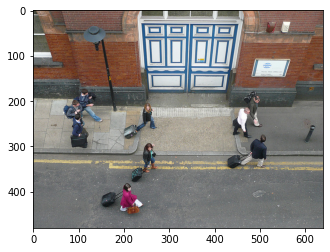

In [82]:
img_file = os.path.join(img_dir, entry['file_name'])
img = Image.open(img_file)
plt.imshow(img)

In [102]:
import torch
a = torch.rand((5,5))
a

tensor([[7.5189e-01, 7.2519e-01, 5.8271e-01, 6.6120e-01, 1.9747e-01],
        [6.4625e-02, 4.9703e-01, 1.7777e-01, 1.4739e-01, 5.8846e-01],
        [3.5967e-01, 1.8617e-01, 2.6991e-01, 1.8255e-01, 5.5819e-01],
        [5.4549e-01, 7.1295e-01, 3.7635e-01, 1.2250e-01, 3.7166e-02],
        [2.0948e-01, 6.2671e-01, 9.7954e-01, 5.2670e-01, 9.6232e-04]])

In [99]:
b= torch.Tensor((1,2,2,3,1,4,0)).long()

In [111]:
cat((a.view(-1, 1),[b]*5), dim=-1).to(torch.int64)

/bin/sh: 1: Syntax error: "(" unexpected (expecting ")")


In [ ]:
def draw_bbox(plt, ax, rois, fill=False, linewidth=2, edgecolor=[1.0, 0.0, 0.0], **kwargs):
    for i in range(rois.shape[0]):
        roi = rois[i,:].astype(np.int)
        ax.add_patch(plt.Rectangle((roi[0], roi[1]),
            roi[2] - roi[0], roi[3] - roi[1],
            fill=False, linewidth=linewidth, edgecolor=edgecolor, **kwargs))

def subplot(plt, (Y, X), (sz_y, sz_x) = (10, 10)):
    plt.rcParams['figure.figsize'] = (X*sz_x, Y*sz_y)
    fig, axes = plt.subplots(Y, X)
    return fig, axes

In [ ]:
# Load COCO annotations for V-COCO images
coco = vu.load_coco()

# Load the VCOCO annotations for vcoco_train image set
vcoco_all = vu.load_vcoco('vcoco_train')
for x in vcoco_all:
    x = vu.attach_gt_boxes(x, coco)

In [4]:
# Action classes and roles in V-COCO
classes = [x['action_name'] for x in vcoco_all]
for i, x in enumerate(vcoco_all):
    print '{:>20s}'.format(x['action_name']), x['role_name']

                hold ['agent', 'obj']
               stand ['agent']
                 sit ['agent', 'instr']
                ride ['agent', 'instr']
                walk ['agent']
                look ['agent', 'obj']
                 hit ['agent', 'instr', 'obj']
                 eat ['agent', 'instr', 'obj']
                jump ['agent', 'instr']
                 lay ['agent', 'instr']
       talk_on_phone ['agent', 'instr']
               carry ['agent', 'obj']
               throw ['agent', 'obj']
               catch ['agent', 'obj']
                 cut ['agent', 'instr', 'obj']
                 run ['agent']
    work_on_computer ['agent', 'instr']
                 ski ['agent', 'instr']
                surf ['agent', 'instr']
          skateboard ['agent', 'instr']
               smile ['agent']
               drink ['agent', 'instr']
                kick ['agent', 'obj']
               point ['agent', 'instr']
                read ['agent', 'obj']
           snowboard ['agent'

In [5]:
# Visualize annotations for the some class
cls_id = classes.index('hit')
vcoco = vcoco_all[cls_id]

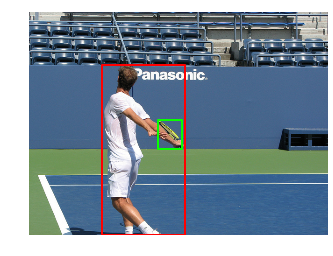

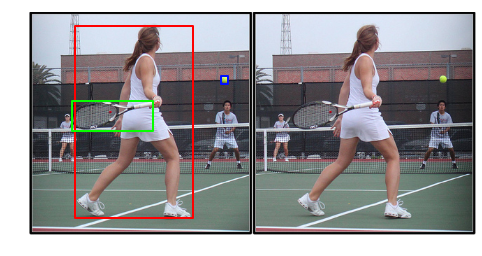

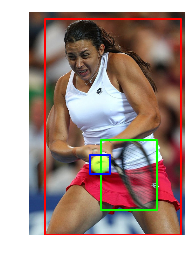

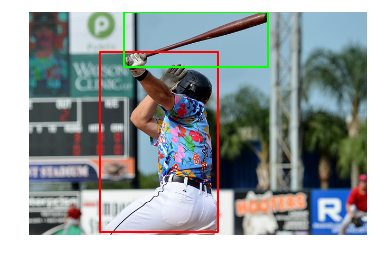

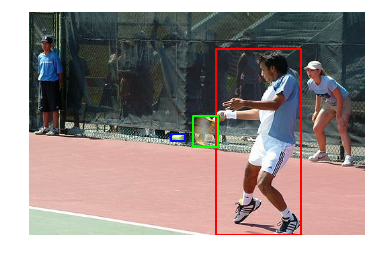

In [6]:
np.random.seed(1)
positive_index = np.where(vcoco['label'] == 1)[0]
positive_index = np.random.permutation(positive_index)

# the demo here laods images from the COCO website, 
# you can alternatively use your own local folder of COCO images.
load_coco_image_from_web = True
if load_coco_image_from_web:
    base_coco_url = 'http://mscoco.org/images/'
    from PIL import Image
    import urllib, cStringIO

cc = plt.get_cmap('hsv', lut=4)

for i in range(5):
    id = positive_index[i]

    # load image
    coco_image = coco.loadImgs(ids=[vcoco['image_id'][id][0]])[0]
    if load_coco_image_from_web:
        coco_url = base_coco_url + str(coco_image['id'])
        file = cStringIO.StringIO(urllib.urlopen(coco_url).read())
        im = np.asarray(Image.open(file))
        
    sy = 4.; sx = float(im.shape[1])/float(im.shape[0])*sy;
    fig, ax = subplot(plt, (1,1), (sy,sx)); ax.set_axis_off(); 
    ax.imshow(im);
    
    # draw bounding box for agent
    draw_bbox(plt, ax, vcoco['bbox'][[id],:], edgecolor=cc(0)[:3])
    role_bbox = vcoco['role_bbox'][id,:]*1.
    role_bbox = role_bbox.reshape((-1,4))
    for j in range(1, len(vcoco['role_name'])):
        if not np.isnan(role_bbox[j,0]):
            draw_bbox(plt, ax, role_bbox[[j],:], edgecolor=cc(j)[:3])